In [14]:
import sys
fp = "/media/vedant/New Volume/DPythonProjects/yt_summarizer"

sys.path.insert(1, fp)   
fp = "/media/vedant/New Volume/DPythonProjects/yt_summarizer/v2"

sys.path.insert(1, fp)   

from v2.helper import Helper

Helper.log("Hello, world!")


Hello, world!


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_macd(prices, slow_period=26, fast_period=12, signal_period=9):
    """
    Calculate MACD (Moving Average Convergence Divergence) for a given price series.
    
    Parameters:
    - prices: numpy array or list of stock prices
    - slow_period: longer-term EMA period (default 26)
    - fast_period: shorter-term EMA period (default 12)
    - signal_period: signal line EMA period (default 9)
    
    Returns:
    - Dictionary containing MACD components and buy/sell signals
    """
    # Convert to numpy array for consistency
    prices = np.array(prices)
    
    # Calculate Exponential Moving Averages (EMA)
    def exponential_moving_average(data, period):
        return pd.Series(data).ewm(span=period, adjust=False).mean().values
    
    # Calculate fast and slow EMAs
    fast_ema = exponential_moving_average(prices, fast_period)
    slow_ema = exponential_moving_average(prices, slow_period)
    
    # Calculate MACD Line (fast EMA - slow EMA)
    macd_line = fast_ema - slow_ema
    
    # Calculate Signal Line (EMA of MACD Line)
    signal_line = exponential_moving_average(macd_line, signal_period)
    
    # Calculate MACD Histogram
    macd_histogram = macd_line - signal_line
    
    # Generate Buy/Sell Signals
    signals = np.zeros_like(prices)
    # Buy signal: MACD Line crosses above Signal Line
    buy_signals = np.where((macd_line[1:] > signal_line[1:]) & 
                            (macd_line[:-1] <= signal_line[:-1]))[0] + 1
    
    # Sell signal: MACD Line crosses below Signal Line
    sell_signals = np.where((macd_line[1:] < signal_line[1:]) & 
                             (macd_line[:-1] >= signal_line[:-1]))[0] + 1
    
    # Mark signals
    signals[buy_signals] = 1  # Buy
    signals[sell_signals] = -1  # Sell
    
    return {
        'prices': prices,
        'macd_line': macd_line,
        'signal_line': signal_line,
        'histogram': macd_histogram,
        'signals': signals,
        'buy_points': buy_signals,
        'sell_points': sell_signals
    }

def visualize_macd(macd_results):
    """
    Visualize MACD analysis with price, MACD line, signal line, and histogram.
    
    Parameters:
    - macd_results: Dictionary returned by calculate_macd function
    """
    plt.figure(figsize=(12, 8))
    
    # Price subplot
    plt.subplot(2, 1, 1)
    plt.title('Stock Price and MACD Signals')
    plt.plot(macd_results['prices'], label='Price')
    
    # Mark buy and sell points
    buy_points = macd_results['buy_points']
    sell_points = macd_results['sell_points']
    plt.scatter(buy_points, macd_results['prices'][buy_points], 
                color='green', marker='^', label='Buy Signal')
    plt.scatter(sell_points, macd_results['prices'][sell_points], 
                color='red', marker='v', label='Sell Signal')
    plt.legend()
    
    # MACD subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD Indicator')
    plt.plot(macd_results['macd_line'], label='MACD Line', color='blue')
    plt.plot(macd_results['signal_line'], label='Signal Line', color='red')
    plt.bar(range(len(macd_results['histogram'])), 
            macd_results['histogram'], 
            label='Histogram', 
            color='gray', 
            alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [16]:
from v2.processed_frame import ProcessedFrame
from v2.helper import Helper

In [17]:
objects_path = "/media/vedant/New Volume/DPythonProjects/yt_summarizer/v2/data_archive_1/qvtkth_python_object/processed_frames.pkl"
processed_frames = Helper.load_python_object(objects_path)

x_data, y_data = ProcessedFrame.get_data_for_plotting(processed_frames)
x_data[:5]

[0, 90, 180, 270, 360]

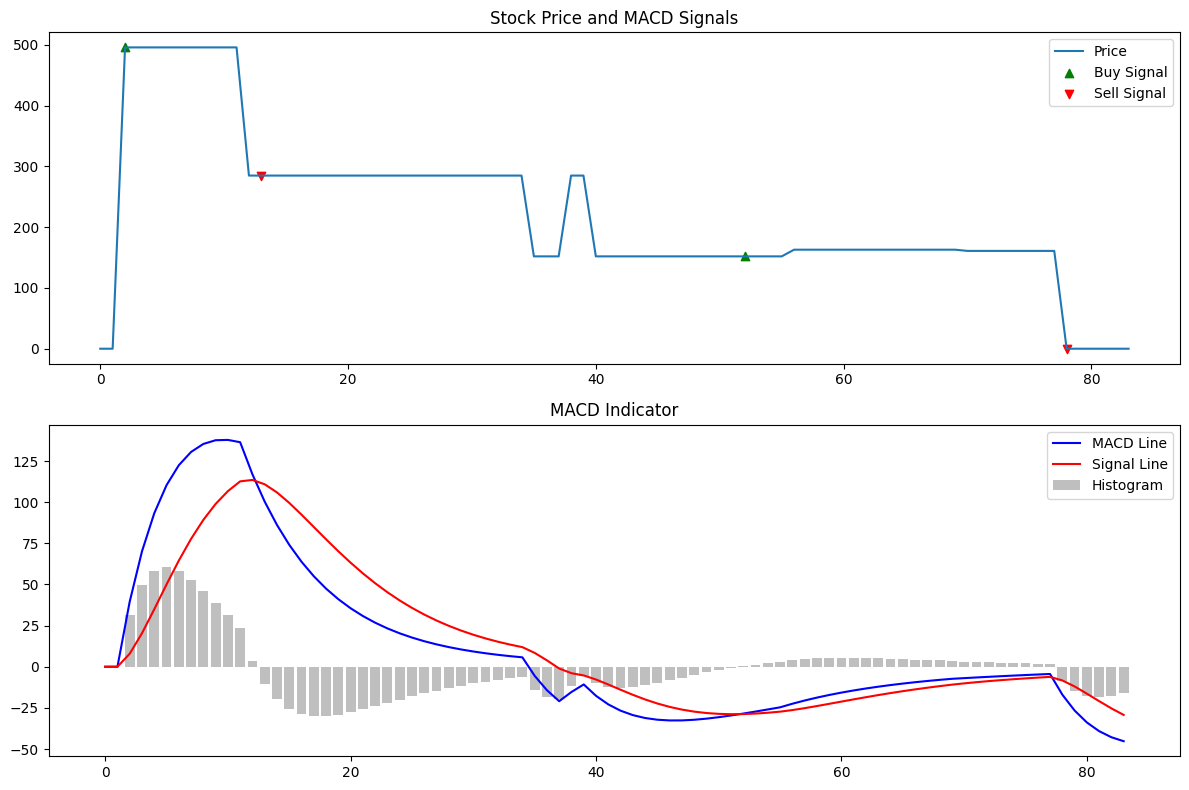

Buy Points (Indices): [ 2 52]
Sell Points (Indices): [13 78]


In [20]:
# Sample stock price data_archive_1 (replace with your actual price array)
sample_prices = y_data

# Perform MACD analysis
macd_analysis = calculate_macd(sample_prices,
                            #    slow_period=52,
                            #      fast_period=24,
                               )

# Visualize results
visualize_macd(macd_analysis)

# Print buy and sell points
print("Buy Points (Indices):", macd_analysis['buy_points'])
print("Sell Points (Indices):", macd_analysis['sell_points'])
 

In [21]:
len(macd_analysis['sell_points'])

2

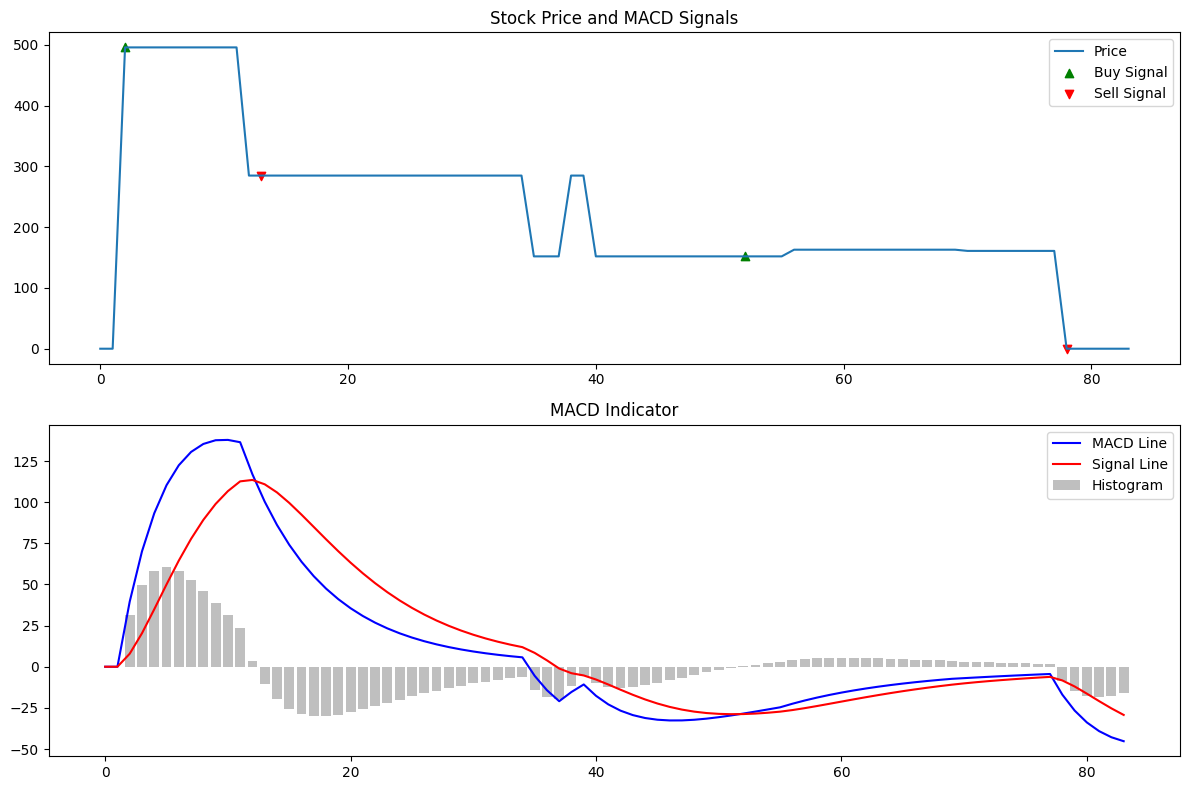

Above could come under obstacles of this

The approach of using the **Moving Average Convergence Divergence (MACD)** indicator to identify buying and selling points is based on the principle of analyzing the momentum of price changes and the interaction between short-term and long-term trends. Here's the intuition behind this approach:

---

### **1. Tracking Momentum**
- The **MACD Line** (difference between the fast EMA and slow EMA) measures the momentum of price changes.
  - If the fast EMA (shorter period) rises above the slow EMA (longer period), it signals a bullish trend or upward momentum.
  - Conversely, if the fast EMA drops below the slow EMA, it indicates bearish momentum or a downward trend.

---

### **2. Identifying Crossovers**
- The crossover between the **MACD Line** and the **Signal Line** is a key indicator of potential reversals in momentum:
  - **Buy Signal:** When the MACD Line crosses above the Signal Line, it indicates that upward momentum is increasing, suggesting it might be a good time to buy.
  - **Sell Signal:** When the MACD Line crosses below the Signal Line, it signals decreasing momentum, suggesting it might be a good time to sell.

---

### **3. Confirmation with Histogram**
- The **MACD Histogram** (difference between MACD Line and Signal Line) provides a visual representation of the strength of the crossover:
  - A widening histogram indicates increasing momentum in the direction of the trend.
  - A narrowing or reversing histogram suggests weakening momentum, signaling a potential reversal.

---

### **4. Buy/Sell Signals Reflect Reversals**
- **Buying Points:** The strategy assumes that when momentum shifts from bearish to bullish (MACD Line crosses above Signal Line), it's an opportune time to enter a long position.
- **Selling Points:** Similarly, when momentum shifts from bullish to bearish (MACD Line crosses below Signal Line), it may indicate a good time to exit or short the position.

---

### **5. Filtering Noise**
- The use of EMAs smooths out short-term price fluctuations, allowing traders to focus on meaningful trends rather than random price noise.

---

### **Limitations and Considerations**
- The MACD strategy works well in trending markets but may produce false signals in sideways or choppy markets.
- It is often used in conjunction with other technical indicators (e.g., RSI, support/resistance levels) to confirm signals and reduce the risk of false positives.

In essence, the MACD indicator helps traders time their trades by focusing on the changing relationship between short-term and long-term momentum, making it a powerful tool for identifying potential buying and selling opportunities.

So what we could do is for every sell point, do a reverse hill climb until a summit is reached?
But again the obstacle could be that there are blips in the reverse hill climb